# Notebook ICD - 15

### Libraries

In [1]:
import numpy as np
import pandas as pd
from collections import Counter

## KNN from scratch

The K-Nearest Neighbors algorithm is a lazy, instance-based learning algorithm. Given a query instance, it calculates the distance from this instance to all instances in the training data and selects the k nearest neighbors. The predicted class for the query instance is determined by the majority class among these neighbors.

1. Store the training instances and their corresponding labels.
1. For a query instance, compute the distance between the query instance and each training instance (using a distance metric like Euclidean or Manhattan distance).
1. Identify the k nearest neighbors.
1. Classify the query instance based on the majority vote of the neighbors’ labels.

In [2]:
import numpy as np
import pandas as pd
from collections import Counter

class KNNClassifier:
    def __init__(self, k=3):
        """
        k: The number of nearest neighbors to consider for prediction.
        """
        self.k = k
        self.X_train = None  # Training data features
        self.y_train = None  # Training data labels
    
    def fit(self, X, y):
        """
        X: DataFrame containing the training features.
        y: Series or array containing the class labels.
        """
        self.X_train = X
        self.y_train = y
    
    def _euclidean_distance(self, instance1, instance2):
        """
        Calculates the Euclidean distance between two instances.
        
        instance1: First instance (row of feature values).
        instance2: Second instance (row of feature values).
        
        Returns the Euclidean distance between the two instances.
        """
        return np.sqrt(np.sum((instance1 - instance2) ** 2))
    
    def predict(self, X_test):
        """
        Makes predictions for the test dataset using the KNN algorithm.
        
        X_test: DataFrame containing the test features.
        
        Returns a list of predicted class labels for each instance in X_test.
        """
        predictions = []
        
        # Loop through each test instance
        for _, x_test in X_test.iterrows():
            # Calculate the distance between the test instance and all training instances
            distances = []
            for i, x_train in self.X_train.iterrows():
                distance = self._euclidean_distance(x_test.values, x_train.values)
                distances.append((distance, self.y_train[i]))
            
            # Sort distances from smallest to largest and select the k nearest neighbors
            distances.sort(key=lambda x: x[0])
            k_nearest_neighbors = distances[:self.k]
            
            # Retrieve the labels of the nearest neighbors
            k_nearest_labels = [label for _, label in k_nearest_neighbors]
            
            # Predict the class by majority voting
            most_common = Counter(k_nearest_labels).most_common(1)
            predictions.append(most_common[0][0])
        
        return predictions

### Implementation example

The Weather (Play Tennis) dataset consists of features such as outlook, temperature, humidity, and windy conditions, which are used to determine whether it is suitable to play tennis. This section demonstrates how to test the custom KNN classifier using this dataset.

First, the dataset is loaded into a pandas DataFrame. Since KNN requires numerical inputs to calculate distances, the categorical features (such as outlook, temperature, humidity, and windy) need to be converted into numerical values. This is achieved using simple mapping:

- Outlook is converted to numbers: sunny = 0, overcast = 1, rain = 2.
- Temperature is mapped as: hot = 0, mild = 1, cool = 2.
- Humidity is mapped as: high = 0, normal = 1.
- Windy is a binary feature and is directly converted to integers: False = 0, True = 1.

After converting these categorical variables into numerical values, the dataset is divided into two parts:
- X: Contains the features (outlook, temperature, humidity, and windy).
- y: Contains the target labels (play tennis: "yes" or "no"), which are also converted into binary values (yes = 1, no = 0).

In [3]:
# Load the dataset (assumed to be uploaded or present in the local system)
data = pd.read_csv('weather.nominal.csv')
data.head()

# Convert categorical variables into numerical values for KNN
data['outlook'] = data['outlook'].map({'sunny': 0, 'overcast': 1, 'rain': 2})
data['temperature'] = data['temperature'].map({'hot': 0, 'mild': 1, 'cool': 2})
data['humidity'] = data['humidity'].map({'high': 0, 'normal': 1})
data['windy'] = data['windy'].astype(int)

# Define X (features) and y (labels)
X = data.drop(columns='play')
y = data['play'].map({'no': 0, 'yes': 1})

# Show the first transformed data
X.head()

,outlook,temperature,humidity,windy
0,0.0,0,0,0
1,0.0,0,0,1
2,1.0,0,0,0
3,NaN,1,0,0
4,NaN,2,1,0


The KNN classifier is instantiated with k=3, which means that the algorithm will look at the 3 nearest neighbors to make predictions. After initializing the classifier, the fit method is called to "train" (actually, store) the model by **storing** the feature matrix X and the label vector y.

In [4]:
# Instantiate the KNN classifier
knn = KNNClassifier(k=3)

# Train the classifier with the training data
knn.fit(X, y)

Next, a test instance is created manually to simulate a new weather condition. In this example, the test instance represents the following conditions:

- Outlook: sunny (mapped to 0)
- Temperature: hot (mapped to 0)
- Humidity: normal (mapped to 1)
- Windy: True (mapped to 1)

This instance is passed to the predict method of the classifier, which calculates the distances to all training instances and determines the majority class among the 3 nearest neighbors.

In [5]:
# Create a test instance
test_instance = pd.DataFrame([{
    'outlook': 0,       # sunny
    'temperature': 0,   # hot
    'humidity': 1,      # normal
    'windy': 1          # TRUE
}])

# Make the prediction
prediction = knn.predict(test_instance)
print(f"Prediction for the test instance: {'yes' if prediction[0] == 1 else 'no'}")

Prediction for the test instance: no


## Scikit-learn implementation

Neighbors-based classification is a type of *instance-based learning* or *non-generalizing learning*: it does not attempt to construct a general internal model, but simply stores instances of the training data. Classification is computed from a simple majority vote of the nearest neighbors of each point: a query point is assigned the data class which has the most representatives within the nearest neighbors of the point.

scikit-learn implements two different nearest neighbors classifiers:`KNeighborsClassifier` implements learning based on the `k` nearest neighbors of each query point, where :math:`k` is an integer value specified by the user. `RadiusNeighborsClassifier` implements learning
based on the number of neighbors within a fixed radius `r` of each training point, where `r` is a floating-point value specified by
the user.

The `k`-neighbors classification in `KNeighborsClassifier` is the most commonly used technique. The optimal choice of the value `k`
is highly data-dependent: in general a larger `k` suppresses the effects of noise, but makes the classification boundaries less distinct.

In cases where the data is not uniformly sampled, radius-based neighbors classification in `RadiusNeighborsClassifier` can be a better choice. The user specifies a fixed radius `r`, such that points in sparser neighborhoods use fewer nearest neighbors for the classification.  For high-dimensional parameter spaces, this method becomes less effective due to the so-called "curse of dimensionality".

The basic nearest neighbors classification uses uniform weights: that is, the value assigned to a query point is computed from a simple majority vote of the nearest neighbors.  Under some circumstances, it is better to weight the neighbors such that nearer neighbors contribute more to the fit.  This can be accomplished through the ``weights`` keyword.  The default value, ``weights = 'uniform'``, assigns uniform weights to each neighbor. ``weights = 'distance'`` assigns weights proportional to the inverse of the distance from the query point.  Alternatively, a user-defined function of the distance can be supplied to compute the weights.

### Library

In [6]:
from sklearn.neighbors import KNeighborsClassifier

### Dataset

In [7]:
df = pd.read_csv(r'weather.numeric.csv')

Show dataset

In [8]:
print(df)

    Day   Outlook  Temperature  Humidity    Wind   Play
0     1     sunny           85        85    weak  False
1     2     sunny           80        90  strong  False
2     3  overcast           83        86    weak   True
3     4      rain           70        96    weak   True
4     5      rain           68        80    weak   True
5     6      rain           65        70  strong  False
6     7  overcast           64        65  strong   True
7     8     sunny           72        95    weak  False
8     9     sunny           69        70    weak   True
9    10      rain           75        80    weak   True
10   11     sunny           75        70  strong   True
11   12  overcast           72        90  strong   True
12   13  overcast           81        75    weak   True
13   14      rain           71        91  strong  False


In [9]:
# defining the dependent and independent variables
X_train = df[['Outlook', 'Temperature', 'Humidity', 'Wind']]
y_train = df[['Play']]

print(X_train.head())
print(y_train.head())

    Outlook  Temperature  Humidity    Wind
0     sunny           85        85    weak
1     sunny           80        90  strong
2  overcast           83        86    weak
3      rain           70        96    weak
4      rain           68        80    weak
    Play
0  False
1  False
2   True
3   True
4   True


### From categorical to numeric

In [10]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

outlook = X_train.iloc[:,0]
outlook_enc = encoder.fit_transform(outlook)
print(outlook.tolist())
print(outlook_enc)

wind = X_train.iloc[:,3]
wind_enc = encoder.fit_transform(wind)
print(wind.tolist())
print(wind_enc)

['sunny', 'sunny', 'overcast', 'rain', 'rain', 'rain', 'overcast', 'sunny', 'sunny', 'rain', 'sunny', 'overcast', 'overcast', 'rain']
[2 2 0 1 1 1 0 2 2 1 2 0 0 1]
['weak', 'strong', 'weak', 'weak', 'weak', 'strong', 'strong', 'weak', 'weak', 'weak', 'strong', 'strong', 'weak', 'strong']
[1 0 1 1 1 0 0 1 1 1 0 0 1 0]


In [11]:
df_outlook = pd.DataFrame(outlook_enc, columns = ['Outlook'])
df_wind = pd.DataFrame(outlook_enc, columns = ['Wind'])
X_train_num = pd.concat([df_outlook, X_train.iloc[:,1], X_train.iloc[:,2], df_wind], axis=1)
print(X_train_num)

    Outlook  Temperature  Humidity  Wind
0         2           85        85     2
1         2           80        90     2
2         0           83        86     0
3         1           70        96     1
4         1           68        80     1
5         1           65        70     1
6         0           64        65     0
7         2           72        95     2
8         2           69        70     2
9         1           75        80     1
10        2           75        70     2
11        0           72        90     0
12        0           81        75     0
13        1           71        91     1


### Generación del modelo

Classifier implementing the k-nearest neighbors vote.

In [12]:
knn = KNeighborsClassifier(n_neighbors=3)
clf = knn.fit(X_train_num, y_train)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


### Evaluando modelo con nueva instancia

In [13]:
# sunny:2, hot:85, normal:65, strong:0 
new_example = [[2, 60, 65, 1]]
X_test = pd.DataFrame(new_example, columns = ['Outlook', 'Temperature', 'Humidity', 'Wind'])
print(X_test)
print(clf.predict(X_test))
print(clf.predict_proba(X_test))

   Outlook  Temperature  Humidity  Wind
0        2           60        65     1
[ True]
[[0.33333333 0.66666667]]


### Visualize boundaries

    Temperature  Humidity
0            85        85
1            80        90
2            83        86
3            70        96
4            68        80
5            65        70
6            64        65
7            72        95
8            69        70
9            75        80
10           75        70
11           72        90
12           81        75
13           71        91


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


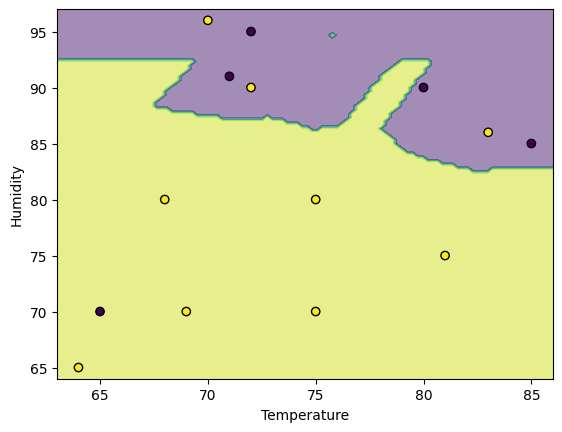

In [14]:
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay

X = pd.concat([X_train_num["Temperature"], X_train_num["Humidity"]], axis=1)
print(X)
clf = knn.fit(X, y_train)

disp = DecisionBoundaryDisplay.from_estimator(
     clf, X, response_method="predict",
     xlabel="Temperature", ylabel="Humidity",
     alpha=0.5,
)
disp.ax_.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y_train.iloc[:, 0], edgecolor="k")
plt.show()